In [3]:
import sqlite3
import matplotlib.pyplot as plt
from statistics import geometric_mean, harmonic_mean, mean, median, stdev

def load_dataset(path, lang):
    con = sqlite3.connect(path)
    con.row_factory = sqlite3.Row
    cur = con.cursor()
    data = []
    cur.execute('SELECT t.id, COUNT(*) as token_length FROM tb_teks_token tt, tb_teks t  WHERE t.id = tt.teks_id AND t.lang = ? GROUP BY t.id', [lang])
    for row in cur.fetchall():
        data.append(row['token_length'])
    con.close()
    return data

In [4]:
MAD_BASE = sorted(load_dataset('./db_parallel_corpus_base.db', 'MAD'))
IND_BASE = sorted(load_dataset('./db_parallel_corpus_base.db', 'IND'))
MAD_WP8K = sorted(load_dataset('./db_parallel_corpus_wp8k.db', 'MAD'))
IND_WP8K = sorted(load_dataset('./db_parallel_corpus_wp8k.db', 'IND'))
data_keys_base = {'MAD_BASE': MAD_BASE, 'IND_BASE': IND_BASE}
data_keys_wp8k = {'MAD_WP8K': MAD_WP8K, 'IND_WP8K': IND_WP8K}
data_keys = {**data_keys_base, **data_keys_wp8k}

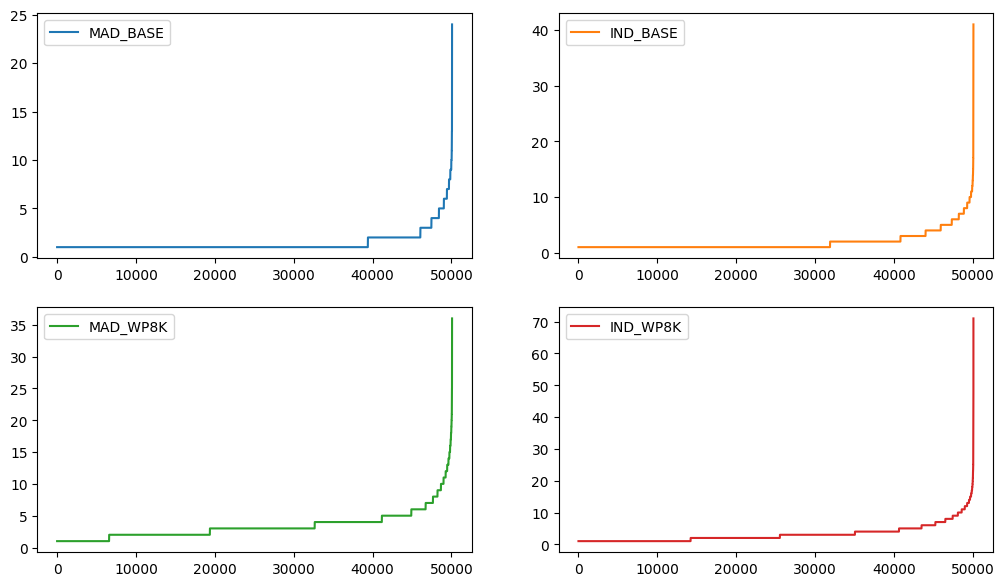

In [5]:
fig, axs = plt.subplots(2, 2)
i = 0
fig.set_size_inches(18.5/1.5, 10.5/1.5)
axs = axs.flatten()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for data in data_keys:
    axs[i].plot(data_keys[data], color=colors[i], label=data)
    axs[i].legend()
    i += 1


In [6]:
# get all median, mean, stdev, etc
for data in data_keys:
    print(data)
    print('Max: ', max(data_keys[data]))
    print('Median: ', median(data_keys[data]))
    print('Mean: ', mean(data_keys[data]))
    print('Stdev: ', stdev(data_keys[data]))
    print('Geometric Mean: ', geometric_mean(data_keys[data]))
    print('Harmonic Mean: ', harmonic_mean(data_keys[data]))
    print('')

MAD_BASE
Max:  24
Median:  1
Mean:  1.4314954969347204
Stdev:  1.173504024818989
Geometric Mean:  1.234833663736217
Harmonic Mean:  1.1459415601117948

IND_BASE
Max:  41
Median:  1
Mean:  1.9128542045250314
Stdev:  1.8325853851311744
Geometric Mean:  1.4969672329767605
Harmonic Mean:  1.2991014739983475

MAD_WP8K
Max:  36
Median:  3.0
Mean:  3.3780999161375345
Stdev:  2.346190216912392
Geometric Mean:  2.829680175221667
Harmonic Mean:  2.3900470257306434

IND_WP8K
Max:  71
Median:  2.0
Mean:  3.203885627570784
Stdev:  2.808985587198761
Geometric Mean:  2.438399613999391
Harmonic Mean:  1.9382772373691455



In [ ]:
con = sqlite3.connect('./db_parallel_corpus_base.db')
con.row_factory = sqlite3.Row
cur = con.cursor()
cur.execute('SELECT "text", "index" from tb_teks WHERE lang = ? ORDER BY "index"', ['MAD'])
madtxt = cur.fetchall()
cur.execute('SELECT "text", "index" from tb_teks WHERE lang = ? ORDER BY "index"', ['IND'])
indtxt = cur.fetchall()
con.close()
with open('../7. Testing/kamus.txt', 'w', encoding='utf8') as f:
    for mad, ind in zip(madtxt, indtxt):
        f.write(mad['text'] + '\n')
        f.write(ind['text'] + '\n')